In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # 텐서플로가 첫 번째 GPU만 사용하도록 제한
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
        print(e)

In [2]:
import os
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import optimizers


import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
pwd

'e:\\Pill Project\\code\\Model'

In [5]:
# 데이터셋 디렉터리 경로
dataset_dir = 'E:/Pill Project/half_data'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'valid')
test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 224
image_height = 224

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical')

# 테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical')

Found 207360 images belonging to 400 classes.
Found 25920 images belonging to 400 classes.
Found 25920 images belonging to 400 classes.


In [5]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [6]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape

(64, 224, 224, 3)

In [7]:
# 라벨 배치의 크기
# (배치개수, 카테고리개수)
labels_batch.shape

(64, 800)

In [8]:
# 첫 번째 데이터 배치 출력
data_batch[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

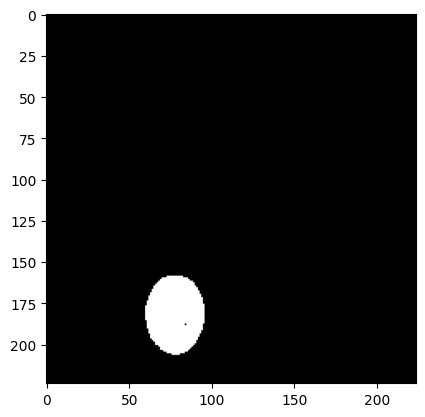

In [9]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [10]:
# 첫 번째 라벨 배치 출력
labels_batch[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [11]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list

{'aamari': 0,
 'abe': 1,
 'aberin': 2,
 'acl': 3,
 'acti': 4,
 'acto': 5,
 'aeki': 6,
 'aenidi': 7,
 'aetraj': 8,
 'afrea': 9,
 'afreb': 10,
 'ajat': 11,
 'ajubron': 12,
 'ajurok': 13,
 'aldr': 14,
 'alerdin': 15,
 'alf': 16,
 'alfu': 17,
 'alge': 18,
 'all': 19,
 'aller': 20,
 'allfre': 21,
 'alllo': 22,
 'allmaxa': 23,
 'allmaxb': 24,
 'allmaxc': 25,
 'allmaxd': 26,
 'allmaxe': 27,
 'allmaxf': 28,
 'allmejlr': 29,
 'allmex': 30,
 'allpen': 31,
 'allpid': 32,
 'allpin': 33,
 'allpinj': 34,
 'allrej': 35,
 'allrofree': 36,
 'allstex': 37,
 'allwinner': 38,
 'alr': 39,
 'alro': 40,
 'alrse': 41,
 'alrun': 42,
 'altr': 43,
 'ama': 44,
 'amad': 45,
 'ambz': 46,
 'amecabon': 47,
 'amedilj': 48,
 'amhidp': 49,
 'ami': 50,
 'amin': 51,
 'amis': 52,
 'amjtan': 53,
 'amlo': 54,
 'an': 55,
 'anabon': 56,
 'anaj': 57,
 'anajong': 58,
 'anatan': 59,
 'angel': 60,
 'anti': 61,
 'any': 62,
 'apejil': 63,
 'apen': 64,
 'apfd': 65,
 'apjil': 66,
 'apttakj': 67,
 'apur': 68,
 'ara': 69,
 'arak': 70,
 

In [12]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'aamari',
 1: 'abe',
 2: 'aberin',
 3: 'acl',
 4: 'acti',
 5: 'acto',
 6: 'aeki',
 7: 'aenidi',
 8: 'aetraj',
 9: 'afrea',
 10: 'afreb',
 11: 'ajat',
 12: 'ajubron',
 13: 'ajurok',
 14: 'aldr',
 15: 'alerdin',
 16: 'alf',
 17: 'alfu',
 18: 'alge',
 19: 'all',
 20: 'aller',
 21: 'allfre',
 22: 'alllo',
 23: 'allmaxa',
 24: 'allmaxb',
 25: 'allmaxc',
 26: 'allmaxd',
 27: 'allmaxe',
 28: 'allmaxf',
 29: 'allmejlr',
 30: 'allmex',
 31: 'allpen',
 32: 'allpid',
 33: 'allpin',
 34: 'allpinj',
 35: 'allrej',
 36: 'allrofree',
 37: 'allstex',
 38: 'allwinner',
 39: 'alr',
 40: 'alro',
 41: 'alrse',
 42: 'alrun',
 43: 'altr',
 44: 'ama',
 45: 'amad',
 46: 'ambz',
 47: 'amecabon',
 48: 'amedilj',
 49: 'amhidp',
 50: 'ami',
 51: 'amin',
 52: 'amis',
 53: 'amjtan',
 54: 'amlo',
 55: 'an',
 56: 'anabon',
 57: 'anaj',
 58: 'anajong',
 59: 'anatan',
 60: 'angel',
 61: 'anti',
 62: 'any',
 63: 'apejil',
 64: 'apen',
 65: 'apfd',
 66: 'apjil',
 67: 'apttakj',
 68: 'apur',
 69: 'ara',
 70: 'arak',
 

In [13]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

'kbaroj'

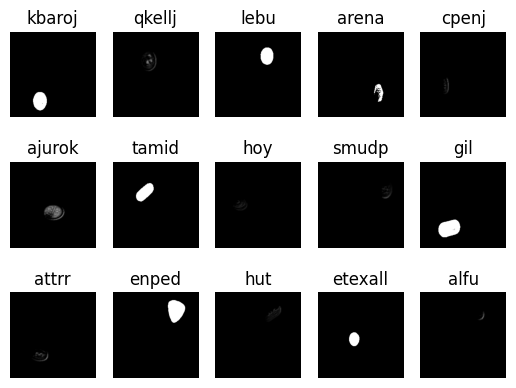

In [14]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break

    plt.subplot(rows, columns, num + 1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

# 기존 모델

In [15]:
# 기존 모델

model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 5
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())

# Layer 6
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(400, activation='softmax'))

# 두번째 모델

In [20]:
# 두 번째 모델
# Layer 5 Conv2D, pool_size 변경
model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 5, pool_size(3, 3) -> pool_size(2, 2)로 변경
model.add(Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())

# Layer 6
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer, 클래스 개수
model.add(Dense(800, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 384)      

In [22]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
batch_size = 64
epochs = 120

In [24]:
# Train the model
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size)

Epoch 1/120
6448/6448 [==============================] - 5044s 782ms/step - loss: 5.3969 - accuracy: 0.0388 - val_loss: 3.1298 - val_accuracy: 0.2222
Epoch 2/120
6448/6448 [==============================] - 765s 119ms/step - loss: 2.5973 - accuracy: 0.2946 - val_loss: 4.8614 - val_accuracy: 0.1435
Epoch 3/120
6448/6448 [==============================] - 420s 65ms/step - loss: 1.5560 - accuracy: 0.5260 - val_loss: 1.5823 - val_accuracy: 0.5277
Epoch 4/120
6448/6448 [==============================] - 428s 66ms/step - loss: 1.1417 - accuracy: 0.6373 - val_loss: 2.8939 - val_accuracy: 0.3827
Epoch 5/120
6448/6448 [==============================] - 651s 101ms/step - loss: 0.9214 - accuracy: 0.7010 - val_loss: 0.8705 - val_accuracy: 0.7172
Epoch 6/120
6448/6448 [==============================] - 844s 131ms/step - loss: 0.7803 - accuracy: 0.7436 - val_loss: 1.5585 - val_accuracy: 0.5768
Epoch 7/120
6448/6448 [==============================] - 581s 90ms/step - loss: 0.6864 - accuracy: 0.7720 -

KeyboardInterrupt: 

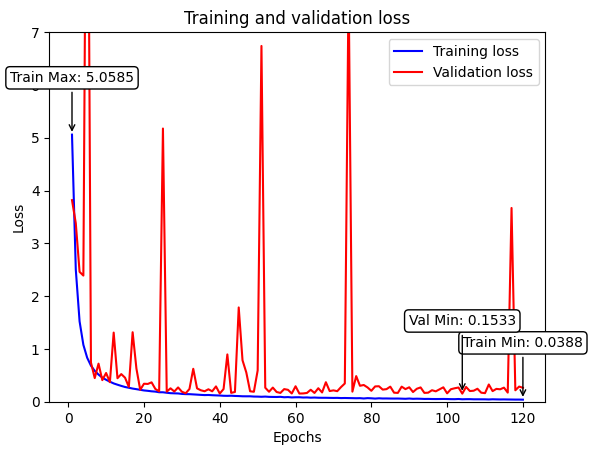

In [48]:
loss = history.history['loss'] # training loss
val_loss = history.history['val_loss'] # validation loss

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Add maximum and minimum values for training loss
max_loss = max(loss)
min_loss = min(loss)
max_loss_epoch = loss.index(max_loss) + 1
min_loss_epoch = loss.index(min_loss) + 1

plt.annotate(f'Train Max: {max_loss:.4f}', xy=(max_loss_epoch, max_loss), xytext=(max_loss_epoch, max_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Train Min: {min_loss:.4f}', xy=(min_loss_epoch, min_loss), xytext=(min_loss_epoch, min_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

# Add maximum and minimum values for validation loss
max_val_loss = max(val_loss)
min_val_loss = min(val_loss)    
max_val_loss_epoch = val_loss.index(max_val_loss) + 1
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

plt.annotate(f'Val Max: {max_val_loss:.4f}', xy=(max_val_loss_epoch, max_val_loss), xytext=(max_val_loss_epoch+2, max_val_loss-10),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Val Min: {min_val_loss:.4f}', xy=(min_val_loss_epoch, min_val_loss), xytext=(min_val_loss_epoch, min_val_loss+1.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

plt.ylim(0, 7)  # Set the y-axis limits between 0 and 1

plt.show()



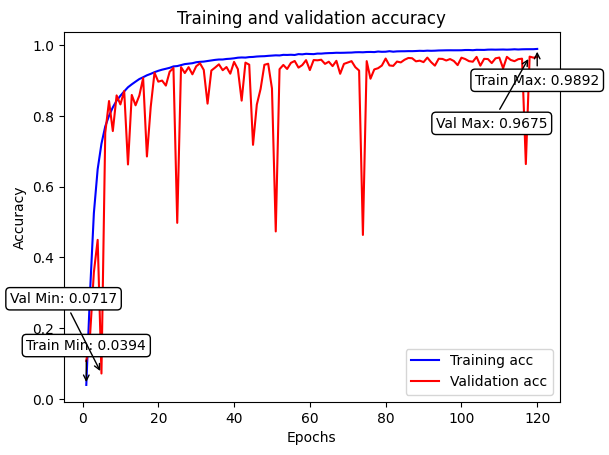

In [50]:
acc = history.history['accuracy'] # training accuracy
val_acc = history.history['val_accuracy'] # validation accuracy

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Add maximum and minimum values for training accuracy
max_acc = max(acc)
min_acc = min(acc)
max_acc_epoch = acc.index(max_acc) + 1
min_acc_epoch = acc.index(min_acc) + 1

plt.annotate(f'Train Max: {max_acc:.4f}', xy=(max_acc_epoch, max_acc), xytext=(max_acc_epoch, max_acc-0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Train Min: {min_acc:.4f}', xy=(min_acc_epoch, min_acc), xytext=(min_acc_epoch, min_acc+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

# Add maximum and minimum values for validation accuracy
max_val_acc = max(val_acc)
min_val_acc = min(val_acc)
max_val_acc_epoch = val_acc.index(max_val_acc) + 1
min_val_acc_epoch = val_acc.index(min_val_acc) + 1

plt.annotate(f'Val Max: {max_val_acc:.4f}', xy=(max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch-10, max_val_acc-0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Val Min: {min_val_acc:.4f}', xy=(min_val_acc_epoch, min_val_acc), xytext=(min_val_acc_epoch-10, min_val_acc+0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

plt.show()


In [3]:
pwd

'e:\\Pill Project\\code\\Model'

In [51]:
# 모델 저장
model.save('E:\Pill Project\model/AlexNet_10_24_data400_batch128_epoch120_m2.h5')

In [6]:
# 저장된 모델 파일 로드
model = models.load_model('E:\Pill Project\model\AlexNet_10_23_data400_batch128_epoch120_m1.h5')

In [7]:
# 테스트셋 평가
results = model.evaluate(test_generator)
results

303/405 [=====================>........] - ETA: 1:21 - loss: 112.7436 - accuracy: 0.0018

KeyboardInterrupt: 

In [67]:
# 테스트셋 예측
results = model.predict(test_generator)
results


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.2787423e-30, 2.7016449e-24, 4.9463494e-18, ..., 1.6600668e-16,
        9.6085330e-08, 1.5015654e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7278096e-25,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.8930568e-34,
        0.0000000e+00, 0.0000000e+00],
       [5.0608034e-29, 9.7062245e-35, 3.6472018e-23, ..., 2.0434284e-32,
        7.3236392e-31, 7.7129303e-11],
       [5.0075893e-28, 1.4215375e-19, 7.8300803e-12, ..., 1.3152367e-15,
        6.8178488e-14, 7.0782126e-18]], dtype=float32)

In [68]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results

array([677,  65, 511, ...,  12, 180, 610], dtype=int64)

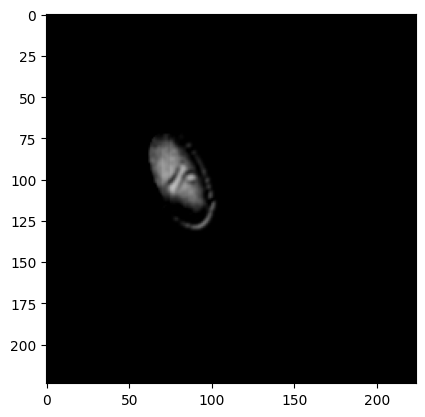

In [74]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [75]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]


'rten'